Looking at how scipy.cluster.hierachy.linkage deals with various input types.

In [48]:
import numpy as np
import scipy.stats
import scipy.spatial
import scipy.cluster.hierarchy
import matplotlib.pyplot as plt

In [55]:
# generate some random points
np.random.seed(seed=1234)
points = np.array([scipy.stats.multivariate_normal.rvs(mean=np.zeros(5)) for i in range(10)])

# calculate a distance matrix
dists = scipy.spatial.distance_matrix(points,points)

# now create a flattened distance vector
flat_dists = []
for i in range(points.shape[0]):
    for j in range(i+1,points.shape[0]):
        flat_dists.append(np.linalg.norm(points[i]-points[j]))

# form linkage matrices for each
Z_points = scipy.cluster.hierarchy.linkage(points)
Z_flat_dists = scipy.cluster.hierarchy.linkage(flat_dists)
Z_dists = scipy.cluster.hierarchy.linkage(dists)

C:\Users\zlind\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


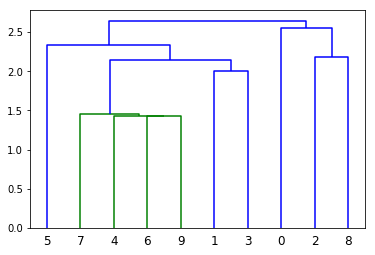

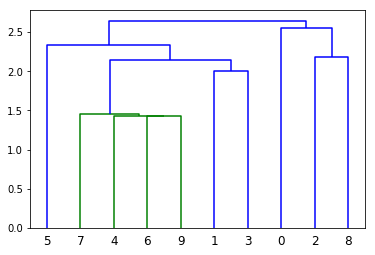

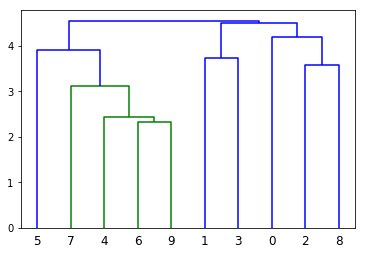

In [56]:
# plot results
dendo_points = scipy.cluster.hierarchy.dendrogram(Z_points)
plt.show()
dendro_flat_dists =  scipy.cluster.hierarchy.dendrogram(Z_flat_dists)
plt.show()
dendo_dists = scipy.cluster.hierarchy.dendrogram(Z_dists)

The dendrograms are similar, but not the same! Notice that the 13 cluster is joined to the 028 cluster first in the "distance matrix" input, while it is joined to the 57469 cluster in the flattened distance/feature input. 